<a href="https://colab.research.google.com/github/LuisaPolicarpo/Used-Cars-Price-Prediction/blob/main/Cars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries for data manipulation
import pandas as pd

import numpy as np

# Import libraries for data visualization
import matplotlib.pyplot as plt

import seaborn as sns

from statsmodels.graphics.gofplots import ProbPlot

from sklearn.tree import plot_tree

# Import libraries for building linear regression model
from statsmodels.formula.api import ols

import statsmodels.api as sm

from sklearn.linear_model import LinearRegression

# Import library for preparing data
from sklearn.model_selection import train_test_split

# Import library for data preprocessing
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_white
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

import pylab

import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")

In [6]:
df_cars= pd.read_csv("https://raw.githubusercontent.com/LuisaPolicarpo/Used-Cars-Price-Prediction/main/used_cars.csv")
df_cars.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74


**EDA**

In [13]:
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   float64
 9   Engine             7207 non-null   float64
 10  Power              7078 non-null   float64
 11  Seats              7200 non-null   float64
 12  New_price          1006 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 793.4+ KB


In [12]:
df_cars.dtypes

,0
S.No.,int64
Name,object
Location,object
Year,int64
Kilometers_Driven,int64
Fuel_Type,object
Transmission,object
Owner_Type,object
Mileage,float64
Engine,float64


In [14]:
#Since it is impossible to have 0 in Mileage, replacing it with NaN
df_cars['Mileage'] = df_cars['Mileage'].replace(0, np.nan)

In [15]:
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7170 non-null   float64
 9   Engine             7207 non-null   float64
 10  Power              7078 non-null   float64
 11  Seats              7200 non-null   float64
 12  New_price          1006 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 793.4+ KB


In [16]:
#Missing values
missing_values= df_cars.isnull().sum()
missing_values

,0
S.No.,0
Name,0
Location,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,83
Engine,46


In [18]:
# % of missing values

total_rows = len(df_cars)

missing_percentages = (missing_values / total_rows) * 100
missing_percentages

,0
S.No.,0.000000
Name,0.000000
Location,0.000000
Year,0.000000
Kilometers_Driven,0.000000
Fuel_Type,0.000000
Transmission,0.000000
Owner_Type,0.000000
Mileage,1.144354
Engine,0.634220


In [27]:
import pandas as pd
import matplotlib.pyplot as plt

def explore_columns(df_cars):
    # Check for missing values
    print("🔍 Missing Values:\n")
    print(df_cars.isnull().sum()[df_cars.isnull().sum() > 0])
    print("\n" + "="*50 + "\n")

    # Describe numerical columns
    print("📊 Descriptive Statistics (Numerical Columns):\n")
    print(df_cars.describe().T)

    # Plot histograms for numerical columns
    num_cols = df_cars.select_dtypes(include='number').columns
    df_cars[num_cols].hist(figsize=(15, 12), bins=30, edgecolor='black')
    plt.tight_layout()
    plt.show()


🔍 Missing Values:

Mileage        83
Engine         46
Power         175
Seats          53
New_price    6247
Price        1234
dtype: int64


📊 Descriptive Statistics (Numerical Columns):

                    count          mean           std      min        25%  \
S.No.              7253.0   3626.000000   2093.905084     0.00   1813.000   
Year               7253.0   2013.365366      3.254421  1996.00   2011.000   
Kilometers_Driven  7253.0  58699.063146  84427.720583   171.00  34000.000   
Mileage            7170.0     18.346527      4.157910     6.40     15.300   
Engine             7207.0   1616.573470    595.285137    72.00   1198.000   
Power              7078.0    112.765214     53.493553    34.20     75.000   
Seats              7200.0      5.280417      0.809277     2.00      5.000   
New_price          1006.0     22.779692     27.759344     3.91      7.885   
Price              6019.0      9.479468     11.187917     0.44      3.500   

                        50%         75% 

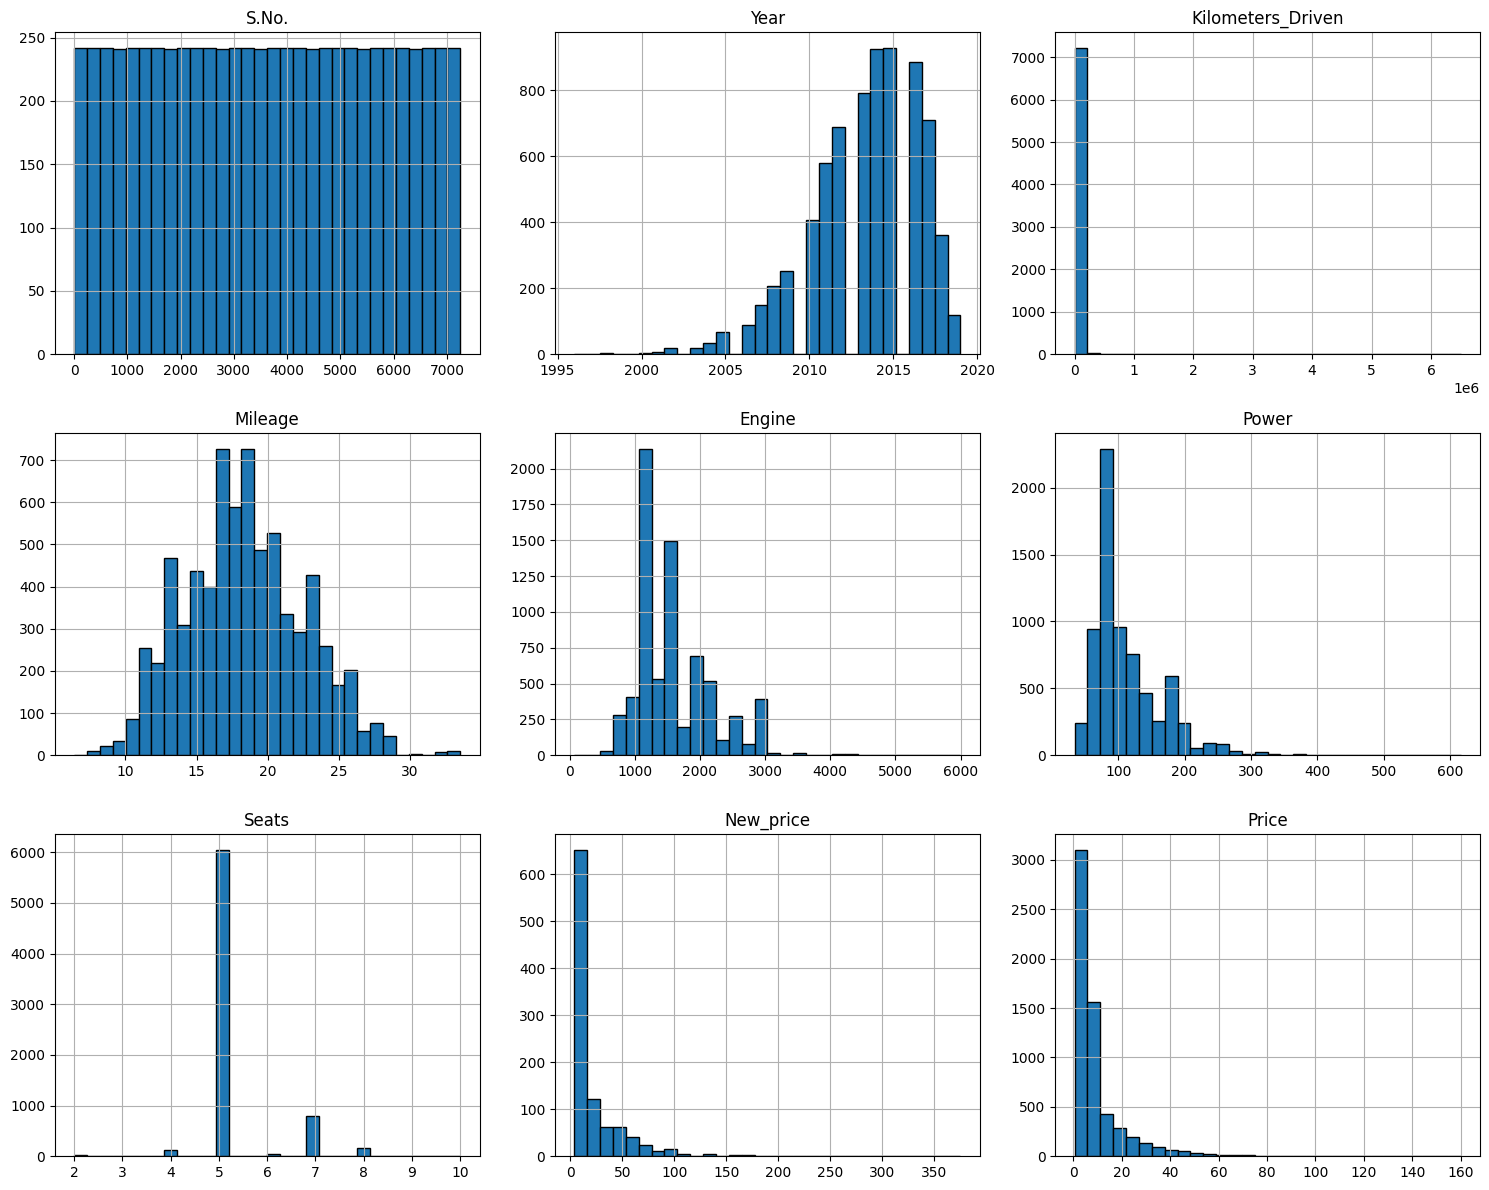

In [28]:
explore_columns(df_cars)

In [29]:
def suggest_imputations(df_cars):
    import numpy as np

    print("📌 Suggested Imputation Strategies:\n")

    for col in df_cars.columns:
        if df_cars[col].isnull().sum() > 0:
            print(f"➡ Column: '{col}'")
            dtype = df_cars[col].dtype

            if dtype == 'object' or df_cars[col].nunique() < 20:
                print("  • Type: Categorical")
                print("  🔧 Suggestion: Fill with mode (most common value)")
            else:
                skewness = df_cars[col].skew(skipna=True)
                print("  • Type: Numerical")
                if abs(skewness) > 1:
                    print(f"  🔧 Suggestion: Fill with median (data is skewed, skew={skewness:.2f})")
                else:
                    print(f"  🔧 Suggestion: Fill with mean (data is more symmetric, skew={skewness:.2f})")
            print(f"  ❗ Missing: {df_cars[col].isnull().sum()} out of {len(df_cars)} rows\n")

In [30]:
suggest_imputations(df_cars)

📌 Suggested Imputation Strategies:

➡ Column: 'Mileage'
  • Type: Numerical
  🔧 Suggestion: Fill with mean (data is more symmetric, skew=0.21)
  ❗ Missing: 83 out of 7253 rows

➡ Column: 'Engine'
  • Type: Numerical
  🔧 Suggestion: Fill with median (data is skewed, skew=1.41)
  ❗ Missing: 46 out of 7253 rows

➡ Column: 'Power'
  • Type: Numerical
  🔧 Suggestion: Fill with median (data is skewed, skew=1.96)
  ❗ Missing: 175 out of 7253 rows

➡ Column: 'Seats'
  • Type: Categorical
  🔧 Suggestion: Fill with mode (most common value)
  ❗ Missing: 53 out of 7253 rows

➡ Column: 'New_price'
  • Type: Numerical
  🔧 Suggestion: Fill with median (data is skewed, skew=4.13)
  ❗ Missing: 6247 out of 7253 rows

➡ Column: 'Price'
  • Type: Numerical
  🔧 Suggestion: Fill with median (data is skewed, skew=3.34)
  ❗ Missing: 1234 out of 7253 rows



In [37]:
def auto_impute(df_cars):
    import numpy as np

    df_cars_imputed = df_cars.copy()
    print("🔧 Applying Automatic Imputations:\n")

    for col in df_cars.columns:
        if df_cars[col].isnull().sum() > 0:
            dtype = df_cars[col].dtype

            # Categorical
            if dtype == 'object' or df_cars[col].nunique() < 20:
                mode_value = df_cars[col].mode()[0]
                df_cars_imputed[col].fillna(mode_value, inplace=True)
                print(f"➡ '{col}': filled with mode ('{mode_value}')")

            # Numerical
            else:
                skewness = df_cars[col].skew(skipna=True)
                if abs(skewness) > 1:
                    median_value = df_cars[col].median()
                    df_cars_imputed[col].fillna(median_value, inplace=True)
                    print(f"➡ '{col}': skew={skewness:.2f}, filled with median ({median_value})")
                else:
                    mean_value = df_cars[col].mean()
                    df_cars_imputed[col].fillna(mean_value, inplace=True)
                    print(f"➡ '{col}': skew={skewness:.2f}, filled with mean ({mean_value})")

    print("\n✅ Imputation complete!")
    return df_cars_imputed

In [39]:
df_cars_clean = auto_impute(df_cars)

🔧 Applying Automatic Imputations:

➡ 'Mileage': skew=0.21, filled with mean (18.34652719665272)
➡ 'Engine': skew=1.41, filled with median (1493.0)
➡ 'Power': skew=1.96, filled with median (94.0)
➡ 'Seats': filled with mode ('5.0')
➡ 'New_price': skew=4.13, filled with median (11.57)
➡ 'Price': skew=3.34, filled with median (5.64)

✅ Imputation complete!


In [40]:
df_cars_clean.isnull().sum()

,0
S.No.,0
Name,0
Location,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,0
Engine,0


In [43]:
# Since we only need the used cars price, droping the new price

df_cars_clean= df_cars_clean.drop('New_price', axis=1)

In [44]:
#Duplicated Data:

df_cars_clean.duplicated().sum()

np.int64(0)

In [45]:
# Number of rows and columns
rows = len(df_cars_clean.axes[0])
cols = len(df_cars_clean.axes[1])


print("Number of Rows: " + str(rows))
print("Number of Columns: " + str(cols))

Number of Rows: 7253
Number of Columns: 13


In [46]:
#Descriptive statistics- numerical
df_cars_clean.describe()

,S.No.,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,7253.000000,7253.000000,7.253000e+03,7253.000000,7253.000000,7253.000000,7253.000000,7253.000000
mean,3626.000000,2013.365366,5.869906e+04,18.346527,1615.789742,112.312448,5.278368,8.826235
std,2093.905084,3.254421,8.442772e+04,4.134048,593.475257,52.922581,0.806668,10.293313
min,0.000000,1996.000000,1.710000e+02,6.400000,72.000000,34.200000,2.000000,0.440000
25%,1813.000000,2011.000000,3.400000e+04,15.400000,1198.000000,77.000000,5.000000,3.850000
50%,3626.000000,2014.000000,5.341600e+04,18.346527,1493.000000,94.000000,5.000000,5.640000
75%,5439.000000,2016.000000,7.300000e+04,21.100000,1968.000000,138.030000,5.000000,8.400000
max,7252.000000,2019.000000,6.500000e+06,33.540000,5998.000000,616.000000,10.000000,160.000000


In [47]:
# Create a dataset with only the numerical variables, droping S.No because it´s not relevant for this analysis
numerics = ['int', 'float']
df_num = df_cars_clean.select_dtypes(include=numerics)
df_num = df_num.drop('S.No.', axis=1)

In [48]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               7253 non-null   int64  
 1   Kilometers_Driven  7253 non-null   int64  
 2   Mileage            7253 non-null   float64
 3   Engine             7253 non-null   float64
 4   Power              7253 non-null   float64
 5   Seats              7253 non-null   float64
 6   Price              7253 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 396.8 KB


In [49]:
# Check the range in order to find outliers

data_ranges = df_num.apply(lambda col: col.max() - col.min())
print(data_ranges)

Year                      23.00
Kilometers_Driven    6499829.00
Mileage                   27.14
Engine                  5926.00
Power                    581.80
Seats                      8.00
Price                    159.56
dtype: float64


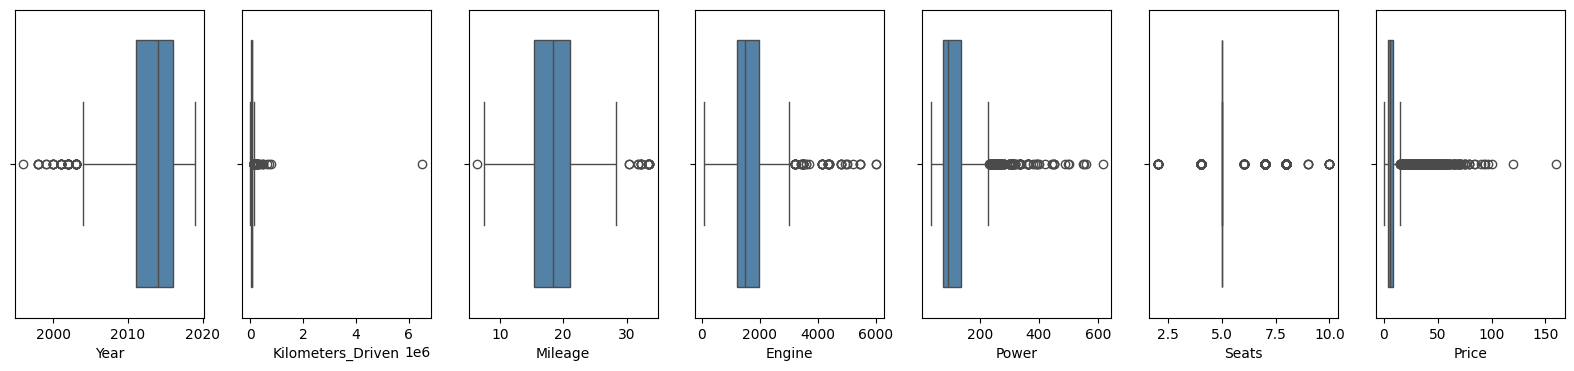

In [50]:
#Boxplots to check outliers

fig, ax = plt.subplots(1,7, figsize = (20, 4))

for var, subplot in zip(df_num, ax.flatten()):

    g = sns.boxplot(data = df_num,

                 x = var,

                 color = "steelblue",

                 ax = subplot)

Observations:

First, I used the describe in order to have a overview of the central tendency, dispersion, and distribution of the data. With the range, we can see the difference between the maximum and minimum values, followed by a visual overview. This 3 methods help me understand the data, seeing the maximum and minium values and outliers that can possible influence my model and perception of the data.

We can conclude: The year has outliers, the oldest car is from 1996 and the youngest from 2019, however the avarage car is from 2013- meaning that the majority of the cars are not very old, however the larger part of the population doesn´t buy new cars.

With the total kilometers driven in the car by the previous owner, we can see outliers. The difference between the max and min values are not very big, having an avarage of 5.87- meaning that the used cars that the population is buying have relativaly the same used.

The standard mileage offered by the car company in kmpl or km/kg not have a high variation, meaning that when the costumer buy the car, it is said to spend similar values.First the value of the min was zero, but that is not possible, so I replace it with the median.

We can observe that the displacement volume of the engine in CC is mostly lower, with a lot of outliers.

Most cars in India, have a low power of the engine as we can observe with our visual representantion. We could also conclude that analysing the meadian, min and max value of this variable.

As expected, the normal number of seats in the car is 5, as observed by the average.

The variable price of cars in India have a lot of outliers, since we have luxury and normal cars, is normal the difference in values.

The outliers in this dataset can be explained with the fact that India is a country with a large population, having people with a lot of buying power but that is not the great part of the population.

In [51]:
# Descriptive statistics- categorical

df_cars_clean.describe(include='object')

,Name,Location,Fuel_Type,Transmission,Owner_Type
count,7253,7253,7253,7253,7253
unique,2041,11,5,2,4
top,Mahindra XUV500 W8 2WD,Mumbai,Diesel,Manual,First
freq,55,949,3852,5204,5952


In [54]:
#Number of unique observations in each category of categorical columns:

for column in df_cars_clean.select_dtypes(include=['object']).columns:
    unique_counts = df_cars_clean[column].value_counts()
    print(f"Unique value counts for {column}:\n{unique_counts}\n")

Unique value counts for Name:
Name
Mahindra XUV500 W8 2WD                   55
Maruti Swift VDI                         49
Maruti Swift Dzire VDI                   42
Honda City 1.5 S MT                      39
Maruti Swift VDI BSIV                    37
                                         ..
Mercedes-Benz E-Class E240 V6 AT          1
Nissan Terrano XE 85 PS                   1
Mahindra TUV 300 2015-2019 T8 AMT         1
Hyundai i20 2015-2017 1.4 CRDi Sportz     1
Hyundai Creta 1.6 VTVT Base               1
Name: count, Length: 2041, dtype: int64

Unique value counts for Location:
Location
Mumbai        949
Hyderabad     876
Coimbatore    772
Kochi         772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Ahmedabad     275
Name: count, dtype: int64

Unique value counts for Fuel_Type:
Fuel_Type
Diesel      3852
Petrol      3325
CNG           62
LPG           12
Electric       2
Name: count, dtype: int64

Unique value co

In [56]:
# Check extreme values

for column in df_cars.columns:
    if df_cars_clean[column].dtype == 'int64' or df_cars_clean[column].dtype == 'float64':
        min_value = df_cars_clean[column].min()
        max_value = df_cars_clean[column].max()
        print(f"Extreme values in '{column}': Min = {min_value}, Max = {max_value}")
    else:
        most_common_value = df_cars_clean[column].value_counts().index[0]
        print(f"Most common value in '{column}': {most_common_value}")

Extreme values in 'S.No.': Min = 0, Max = 7252
Most common value in 'Name': Mahindra XUV500 W8 2WD
Most common value in 'Location': Mumbai
Extreme values in 'Year': Min = 1996, Max = 2019
Extreme values in 'Kilometers_Driven': Min = 171, Max = 6500000
Most common value in 'Fuel_Type': Diesel
Most common value in 'Transmission': Manual
Most common value in 'Owner_Type': First
Extreme values in 'Mileage': Min = 6.4, Max = 33.54
Extreme values in 'Engine': Min = 72.0, Max = 5998.0
Extreme values in 'Power': Min = 34.2, Max = 616.0
Extreme values in 'Seats': Min = 2.0, Max = 10.0
Extreme values in 'Price': Min = 0.44, Max = 160.0


In [55]:
df_cars_clean['Name'].nunique()

2041

In [57]:
df_cars_clean['Brand'] = df_cars_clean['Name'].apply(lambda x: x.split()[0])

df_cars_clean

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.60,5.0,5.64,Volkswagen
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.60,5.0,5.64,Volkswagen
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.10,5.0,5.64,Nissan
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.60,5.0,5.64,Volkswagen


In [58]:
df_cars_clean['Brand'].value_counts()

,count
Brand,
Maruti,1444
Hyundai,1340
Honda,743
Toyota,507
Mercedes-Benz,380
Volkswagen,374
Ford,351
Mahindra,331
BMW,312


In [60]:
word_to_replace = 'ISUZU'
replacement_word = 'Isuzu'
df_cars_clean['Brand'] = df_cars_clean['Brand'].str.replace(word_to_replace, replacement_word)

In [61]:
df_cars_clean['Brand'].value_counts()

,count
Brand,
Maruti,1444
Hyundai,1340
Honda,743
Toyota,507
Mercedes-Benz,380
Volkswagen,374
Ford,351
Mahindra,331
BMW,312


As expected, in a dataset about the India's market, we have a lot of different values. After the exploratory data analysis and data preprocessing, I had a better overwiew and understand of the data. I replaced all the nulls values and replaced the zero values that were not real. I choose to replace the nulls in price with a model, because with such different brands and prices, I felt that the median wouldn't be a real representation. The other values, I replaced with the median.

I was able to compare variables and to analyze the minimum, maximum values and the standard desviation of all the variables.

With a dependent variable that is skewed, I applied a log transformation and check the distribution of the transformed column.

In order to have a better overview, I took the brand of the name column and created a new one with just the brand, where I can analyze more easily the difference between brands.

I was able to compare the price per City and take useful conclusion about India's cities.

I was able to end up with a format more helpfull and suitable in order to have the most accurate model possible.